In [10]:
import pandas as pd
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import os
from scipy import version
version.version

'1.12.0'

In [11]:
windsize = 51
scale = 2.8
os.system(f'./hampel {windsize} {scale}')

Time taken: 8.947000 miliseconds for window size 51 and signal size 40000, used scale 2.800000 
Output for window size 51 created


0

In [12]:
df = pd.read_csv(f'output{windsize}.csv', float_precision='high')
df

,time,input,output,median,MAD
0,0.00000,-4.585333,-4.585333,-4.585333,0.000000
1,0.00005,-3.107299,-3.107299,-3.130063,0.193843
2,0.00010,-3.099761,-3.099761,-3.116114,0.144568
3,0.00015,-3.130063,-3.130063,-3.111819,0.140274
4,0.00020,-3.033141,-3.033141,-3.107299,0.135754
...,...,...,...,...,...
39995,1.99975,2.756957,2.756957,2.733691,0.037662
39996,1.99980,2.726058,2.726058,2.741503,0.029850
39997,1.99985,2.675930,2.751100,2.751100,0.020253
39998,1.99990,2.751100,2.751100,2.756957,0.014395


In [13]:
%timeit medfilt(df.input.values, windsize)

25.6 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
ref_med = medfilt(df.input, windsize)[windsize//2:-windsize//2]
current_med = df['median'].values[windsize//2:-windsize//2]
assert (ref_med == current_med).all()

In [15]:
current_mad = df['MAD'].values[windsize//2:-windsize//2]
ref_mad = df.input.rolling(windsize, center=True).apply(lambda x: np.median(np.abs(x - np.median(x)))).squeeze().values[windsize//2:-windsize//2]
assert np.abs(current_mad - ref_mad).__le__(2e-15).all()

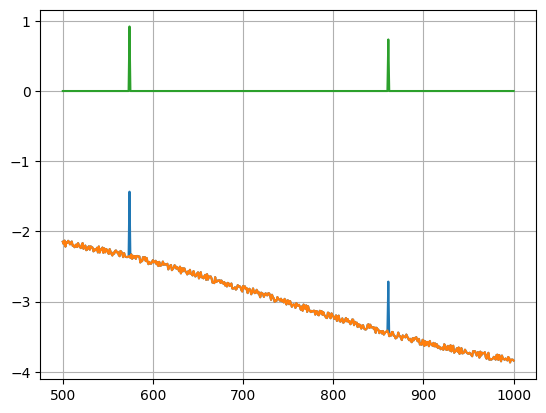

In [16]:
plt.plot(df.loc[500:1000, 'input'])
plt.plot(df.loc[500:1000, 'output'])
plt.plot(df.loc[500:1000, 'input'] - df.loc[500:1000, 'output'])
plt.grid()
plt.show()